## About the Data

1. Name / Title: Net-a-Porter/Mr Porter Fashion Dataset
2. Link to Data:
https://www.kaggle.com/datasets/justinpakzad/net-a-portermr-porter-fashion-dataset
4. Source / Origin: 
	* Author or Creator: Justin Pakzad
	* Publication Date: 2024
	* Publisher: KAGGLE
	* Version or Data Accessed:  The data was sourced from https://www.net-a-porter.com/en-us/
https://www.mrporter.com/en-us/
5. License: CC0: Public Domain
6. Can You Use this Data Set for Your Intended Use Case? (TODO answer this question)

## Format and Samples

### Overview

Format: csv
Size: 1.3Mb
Number of Records: 21389 rows

### Sample of Data

TODO show a few lines of data from the actual file.  ⚠️ Use "regular" Python to do this in this code block.  Assuming that jupyter-lab was started in your root directory: with open('../data/raw/example-data.csv', 'r')

### Fields or Column Headers

* Field/Column 1: brand, type:str
* Field/Column 2: description,  type:str
* Field/Column 3: price_usd, type: int
* Field/Column 4: type:, type: str

## Analysis for this dataset:

1. What is the distribution of prices for different clothing types?
2. What is the relationship between brand and price?
   

In [1]:
# sample of data
import pandas as pd

df = pd.read_csv("../data/raw/mr-porter.csv")
df.head()


,brand,description,price_usd,type
0,VALENTINO,M-Way Rockstud Beatle Patent-Leather Chelsea B...,1550,shoes
1,THE ROW,Owen Suede-Trimmed Nylon Sneakers,830,shoes
2,MANOLO BLAHNIK,Ellis Full-Grain Leather Slip-On Sneakers,725,shoes
3,R.M.WILLIAMS,Craftsman Leather Chelsea Boots,540,shoes
4,MANOLO BLAHNIK,Kensington Shearling-Lined Suede Slippers,775,shoes


## 1. What is the average price for each type of clothing (shoe, shirt, dress, etc.)?
* print out the VALUE COUNTS for 'type' to observe the data I have : CODE BLOCK 2
* MAKE A NEW CALCULATED COLUMN where I take the last word in the description, make it uniform with .upper() and .strip() and filter it based on if the type is 'clothing', if not make the value in the new row None: CODE BLOCK 3
* TRANSFORM MY NEW COLUMN: remove trailing 's' from the values in the new column to make it more uniform: CODE BLOCK 3
* create a mapping of correct values for the clothing type because there were mispellings in the values and I wanted to consolidate the pants together for example to make my graph a little less cluttered: CODE BLOCK 3
* TRANSFORM MY NEW COLUMN: by using the dict to replace the mispellings with the values that I desired
* PLOTTED MY GRAPH: to show the price distributions of different clothing types : CODE BLOCK 4
* PRINTED OUT THE VALUE COUNTS: of clothing type : CODE BLOCK 5
* PRINTED OUT THE INFO OF THE COLUMNS CLOTHING TYPE: CODE BLOCK 6



In [2]:
df["type"].value_counts()

type
clothing       12112
accessories     4257
shoes           1936
sport           1538
watches          504
Name: count, dtype: int64

In [3]:
#Get the last word from the description if the type is clothing, else call it other
df['Clothing Type'] = df.apply(lambda row: row['description'].split()[-1].upper().strip() if row['type'] == 'clothing' else None, axis=1)
#remove the trailing s for uniformity
df['Clothing Type'] = df["Clothing Type"].apply(lambda x : x[:-1] if x is not None and x[-1]=="S" else x)
#dict to map corrections because there are misspellings and I wanted to group the data together a little more
corrections = {
    'SWETPANT': 'SWEATPANT',
    'TROUSER': 'PANT',  
    'TOUSER': 'PANT',
    'JAKCET': 'JACKET',
    'SWEATSHRIT': 'SWEATSHIRT',
    'GILET': 'GILLET',
    'SHRT': 'SHIRT',
    'HAT': 'HAT', 
    'SWIMSHORT': 'SWIM SHORT',
    'ANORAK': 'ANORAK',  
    'BOTTOM': 'BOTTOM',  
    'BRIEF': 'BRIEF', 
    'SHRT': "SHIRT",
    "TRACKPANT" : "PANT",
    "BIB": None,
    "JEAN" : "PANT",
    "MERINO" : None,
    "TOP" : "SHIRT",
    "JOHN" : None,
    "POLO-SHIRT" : "SHIRT",
    "TRUNK" : None,
    'BRIEF' : 'PANT',
    'BOTTOM' : 'PANT',
    'DENIM' : 'PANT',
    'BEANIE' : 'HAT',
    'LINER' : None,
    'PARKA' : 'COAT',
    'OVERCOAT' : 'COAT',
    'PEACOAT' : 'COAT',
    'WAISTCOAT' : 'COAT',
    'ROLLNECK': 'SWEATER',
    'PONCHO' : 'COAT',
    'APRON': None,
    'JOCKSTRAP': None,
    "JERSEY" : "SHIRT",
    "ANORAK" : None,
    'CHINO':"PANT"
}

#replace the corrections in the df
df['Clothing Type'] = df["Clothing Type"].replace(corrections)


<Figure size 1200x600 with 0 Axes>

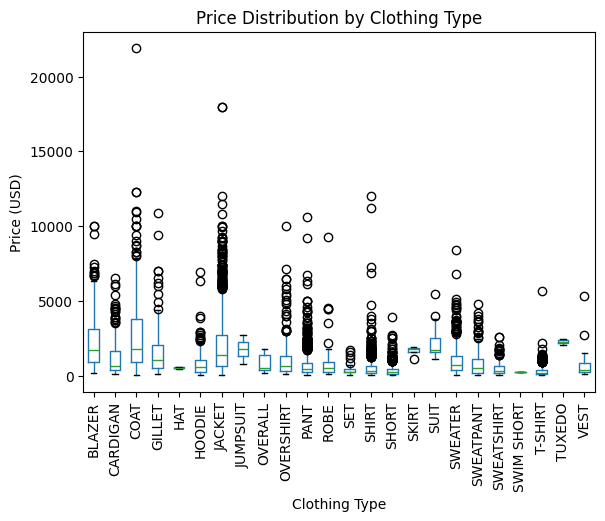

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))  # Ensure this is a tuple (width, height)
df.boxplot(column='price_usd', by='Clothing Type', grid=False)


plt.title('Price Distribution by Clothing Type')
plt.suptitle('')  # Remove the default suptitle to clean up the title area
plt.xlabel('Clothing Type')
plt.ylabel('Price (USD)')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-tick labels for better visibility
plt.show()

In [5]:
#value counts
df["Clothing Type"].value_counts()

Clothing Type
SHIRT         2188
PANT          1939
JACKET        1689
T-SHIRT       1373
SWEATER       1093
SHORT         1001
HOODIE         522
CARDIGAN       437
SWEATSHIRT     378
BLAZER         299
COAT           277
OVERSHIRT      274
SWEATPANT      269
GILLET         186
SET             50
ROBE            43
VEST            42
SUIT            13
OVERALL          7
SKIRT            4
JUMPSUIT         3
TUXEDO           2
HAT              2
SWIM SHORT       1
Name: count, dtype: int64

In [6]:
#info
df["Clothing Type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20347 entries, 0 to 20346
Series name: Clothing Type
Non-Null Count  Dtype 
--------------  ----- 
12092 non-null  object
dtypes: object(1)
memory usage: 159.1+ KB


## BRAND VS PRICE

* print out the info to observe my variables: CODE BLOCK 7
* MAKE A NEW COLUMN where I convert the price to euros : CODE BLOCK 8
* add a new column where I CALCULATE the average price of items of MR.PORTER and group it by the brand name : CODE BLOCK 9
* TRANSFORM the column using .apply() to round the values to 2 decimal places: CODE BLOCK 10
* filter my dataset to only inlcude the top 10 brands as to not make my graph incredibly cluttered and GRAPH/VISUALIZE avg price in euros to the brand: CODE BLOCK 13

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20347 entries, 0 to 20346
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          20347 non-null  object
 1   description    20347 non-null  object
 2   price_usd      20347 non-null  int64 
 3   type           20347 non-null  object
 4   Clothing Type  12092 non-null  object
dtypes: int64(1), object(4)
memory usage: 794.9+ KB


In [8]:
#MAKING A NEW COLUMN where i convert usd to euros
df["price_euro"] = df["price_usd"].apply(lambda x: x*.95)
df['price_euro'].sample(10)

5514      470.25
5545      783.75
7451      128.25
1691      850.25
3841      660.25
3911      285.00
9973      489.25
6829      546.25
18855    1045.00
13739     337.25
Name: price_euro, dtype: float64

In [9]:
#mapping the avg price per brand and making it a new column
df['avg_price_per_brand_euro']= df['brand'].map(df.groupby("brand")["price_euro"].mean())
df.sample(10)

,brand,description,price_usd,type,Clothing Type,price_euro,avg_price_per_brand_euro
3382,FEAR OF GOD,Eternal Straight-Leg Suede Drawstring Trousers,2695,clothing,PANT,2560.25,1128.011905
15010,LORO PIANA,Fringed Cashmere-Blend Scarf,725,accessories,None,688.75,1682.092072
15222,CELINE HOMME,Logo-Embroidered Cotton-Gabardine Baseball Cap,570,accessories,None,541.50,1650.716553
382,CHRISTIAN LOUBOUTIN,Chambeliss Grosgrain-Trimmed Embellished Leath...,1195,shoes,None,1135.25,912.757669
13661,MONCLER,Logo-Jacquard Cotton-Blend Hoodie,765,clothing,HOODIE,726.75,920.685714
7368,BOGLIOLI,Cotton Polo Shirt,520,clothing,SHIRT,494.00,995.216346
2452,UMIT BENAN B+,Cashmere Rollneck Sweater,2069,clothing,SWEATER,1965.55,1871.172414
2534,CELINE HOMME,Straight-Leg Logo-Embroidered Cotton-Blend Vel...,1200,clothing,PANT,1140.00,1650.716553
14770,GUCCI,Monogrammed Full-Grain Leather Duffle Bag,3700,accessories,None,3515.00,1299.351190
11091,SATURDAYS NYC,Signature Logo-Embroidered Cotton-Jersey T-Shirt,50,clothing,T-SHIRT,47.50,141.216216


In [10]:
#transforming the col to not have a ton of decimal points
df['avg_price_per_brand_euro']=df['avg_price_per_brand_euro'].apply(lambda x: round(x,2))

In [11]:
df.sample(10)

,brand,description,price_usd,type,Clothing Type,price_euro,avg_price_per_brand_euro
3940,SUNSPEL,Cotton-Piqué Polo Shirt,160,clothing,SHIRT,152.00,249.82
16147,GUCCI,4cm Leather-Trimmed Logo-Jacquard Belt,490,accessories,None,465.50,1299.35
7557,DUNHILL,Cashmere and Mulberry Silk-Blend Polo Shirt,1150,clothing,SHIRT,1092.50,1015.45
3596,MR P.,Slim-Fit Unstructured Linen Suit Jacket,540,clothing,JACKET,513.00,282.85
736,GUCCI,Logo-Embossed Perforated Leather Sneakers,920,shoes,None,874.00,1299.35
8009,JOHN SMEDLEY,Honeycomb-Knit Merino Wool Zip-Up Cardigan,440,clothing,CARDIGAN,418.00,326.36
18942,MONCLER GRENOBLE,Doron Padded Ripstop Jacket,1195,sport,None,1135.25,1116.79
13389,RRL,Denim Jacket,285,clothing,JACKET,270.75,702.85
10623,CHERRY LOS ANGELES,Garment-Dyed Stone-Washed Logo-Print Cotton-Je...,80,clothing,T-SHIRT,76.00,272.89
19071,MONCLER GRENOBLE,Logo-Appliquéd Jacquard Wool-Blend Beanie,250,sport,None,237.50,1116.79


Text(0.5, 1.0, 'AVERAGE PRICE IN EUROS OF ITEMS FROM 10 MOST POPULAR FASHION BRANDS ON MR.PORTER')

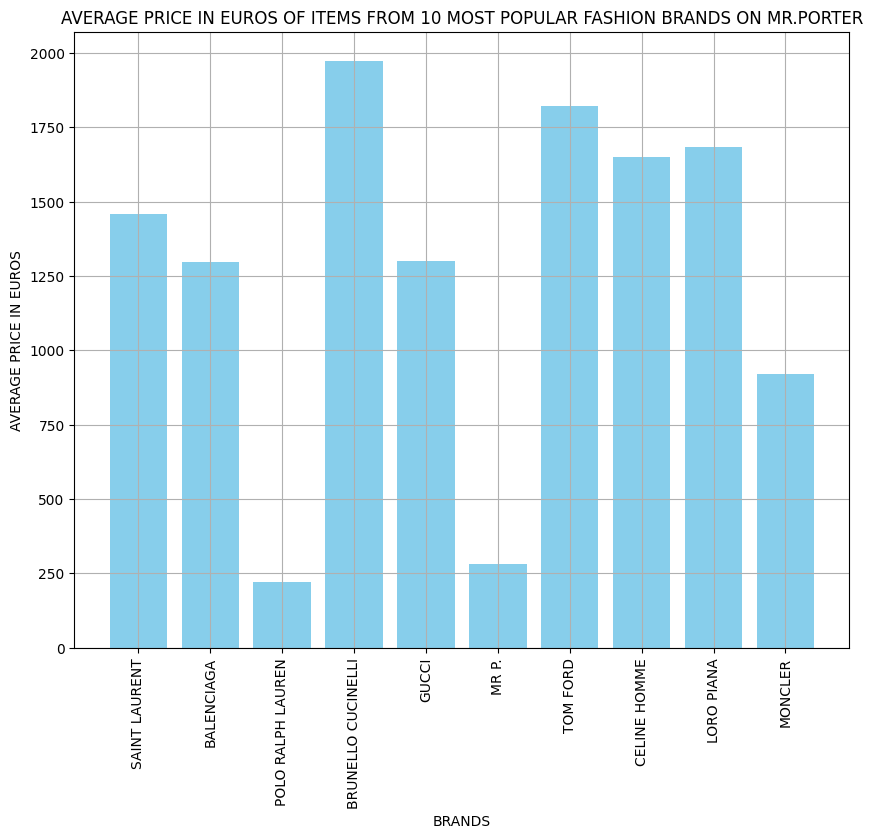

In [13]:
top_ten_brands = df['brand'].value_counts()[:10].index
new_df = df[df['brand'].isin(top_ten_brands)]

plt.figure(figsize= (10,8))
plt.bar(new_df['brand'], new_df["avg_price_per_brand_euro"], color = 'skyblue')
plt.xlabel("BRANDS")
plt.xticks(rotation = 90)
plt.grid()
plt.ylabel("AVERAGE PRICE IN EUROS")
plt.title("AVERAGE PRICE IN EUROS OF ITEMS FROM 10 MOST POPULAR FASHION BRANDS ON MR.PORTER")